In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
#sns.set_context('talk', font_scale=0.85)



In [30]:
df = pd.read_csv('Trial_99_Cleaned', )

In [10]:
df.head()

,Start_Date,End_Date,Last_Name,Version_Duration,Sleep_Quality,Overall_Experience,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,...,Decisiveness,Verbal_Fluency_Word_Recall,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euhphoria_Joy_Happiness,Estimated_Effect_Duration,Current_User_Comparison,Upper_Effect_Duration,Lower_Effect_Duration
0,2017-11-14 14:51:00,2017-11-14 14:52:00,User1,1 weeks,OK,Good,Improved,Improved,Improved,Improved,...,Improved,No effect,No effect,No effect,No effect,No effect,4-8,I am not a Qualia user,8.0,4.0
1,2017-11-08 14:51:00,2017-11-08 14:54:00,User1,1 day,OK,Good,Improved,No effect,No effect,Improved,...,No effect,No effect,No effect,No effect,Improved,Improved,4-8,I am not a Qualia user,8.0,4.0
2,2017-11-17 05:50:00,2017-11-17 05:57:00,User2,1 weeks,OK,Not good,Improved,Improved,Less good,Less good,...,Improved,Improved,Improved,Improved,No effect,No effect,8+,This is less good than Qualia,12.0,8.0
3,2017-11-14 13:40:00,2017-11-14 13:48:00,User2,1 day,OK,Excellent,Improved,Improved,Improved,Improved,...,Improved,Improved,Improved,No effect,No effect,No effect,8+,This is better than Qualia,12.0,8.0
4,2017-11-20 11:05:00,2017-11-20 11:10:00,User3,2 weeks,OK,Good,Improved,No effect,Improved,Improved,...,No effect,No effect,No effect,No effect,No effect,Improved,4-8,This is better than Qualia,8.0,4.0


In [91]:
len(df.Last_Name.unique()) #40 unique users

40

In [94]:
len(df.Last_Name) #

103

In [95]:
#Categorize from the first time users, and not a follow- up

0

## Overall Experience

In general, 63 (61.15%) of users found Trial 99 to be Good and 27 found the trial to be Excellent. This trial seems to be generally favored by most users. Only less than 10 users found the product to be Not good, no effct or awful. 

By categorizing the users based on if the user is a Qualia user or not.

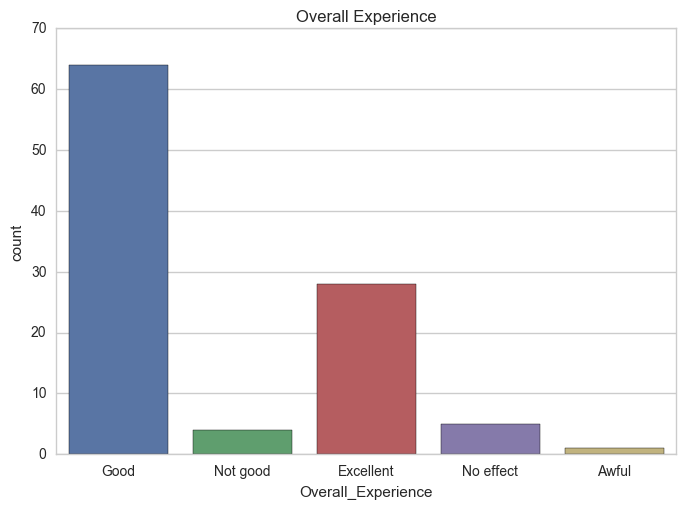

In [86]:
sns.countplot(x="Overall_Experience", data=df)
plt.title('Overall Experience')


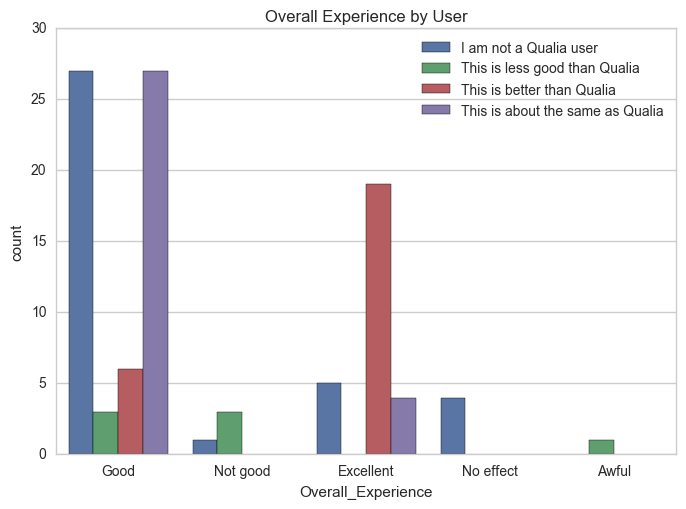

In [121]:
sns.countplot(x="Overall_Experience",hue='Current_User_Comparison', data=df)
plt.legend(loc='upper right')
plt.title('Overall Experience by User')


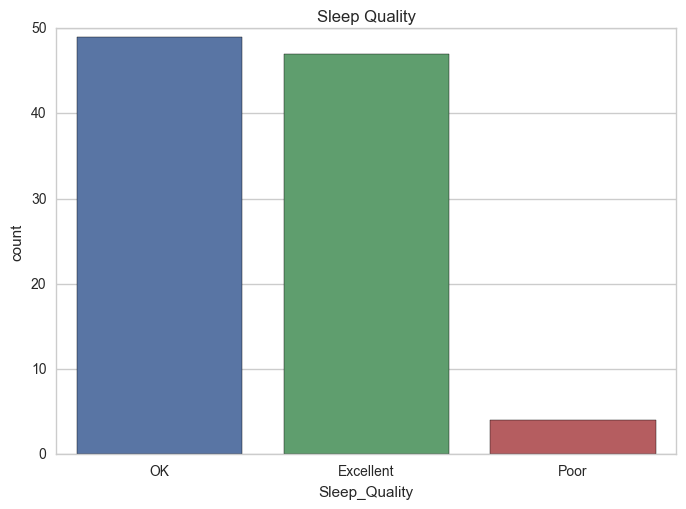

In [102]:
sns.countplot(x="Sleep_Quality",  data=df)
plt.title('Sleep Quality')

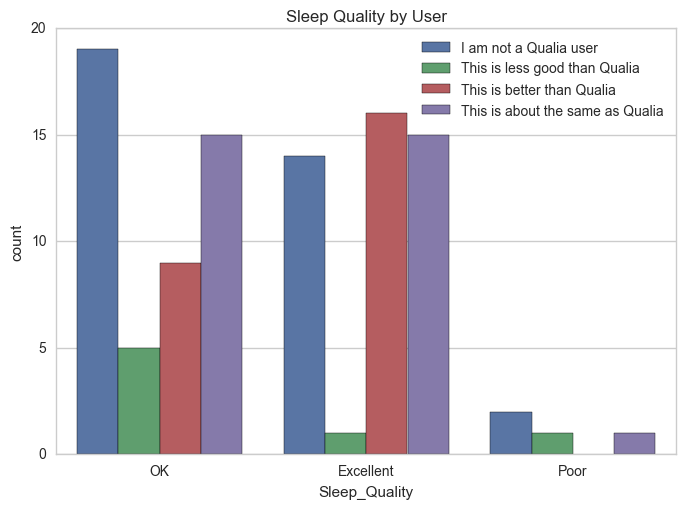

In [56]:
sns.countplot(x="Sleep_Quality", hue='Current_User_Comparison',  data=df)
plt.legend(loc='upper right')
plt.title('Sleep Quality by User')


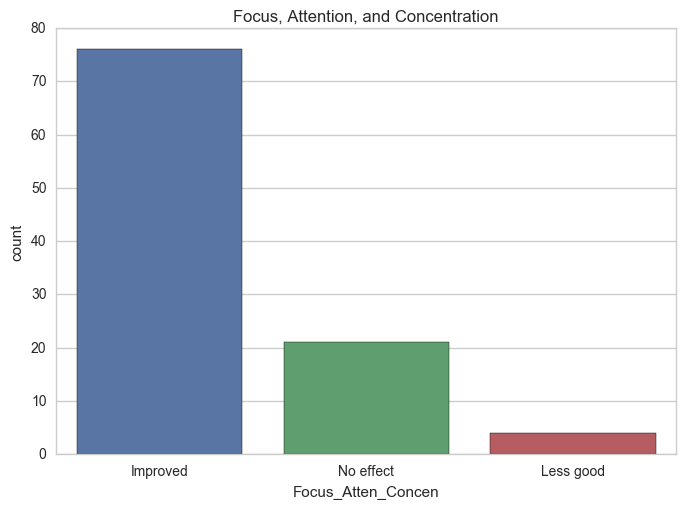

In [103]:
sns.countplot(x='Focus_Atten_Concen', data=df)
plt.title('Focus, Attention, and Concentration')

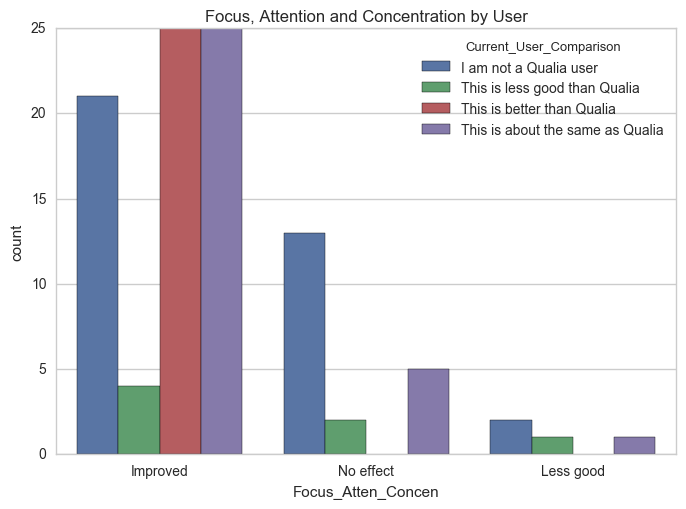

In [104]:
sns.countplot(x='Focus_Atten_Concen', data=df, hue='Current_User_Comparison')
plt.title('Focus, Attention and Concentration by User')

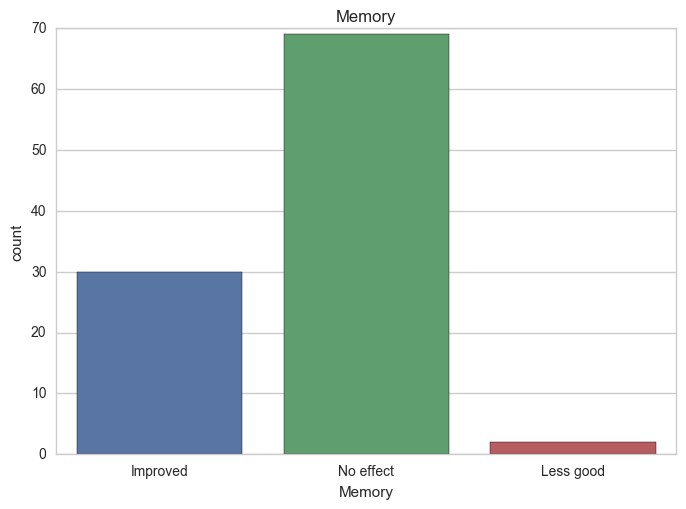

In [106]:
sns.countplot(x='Memory', data=df)
plt.title('Memory')

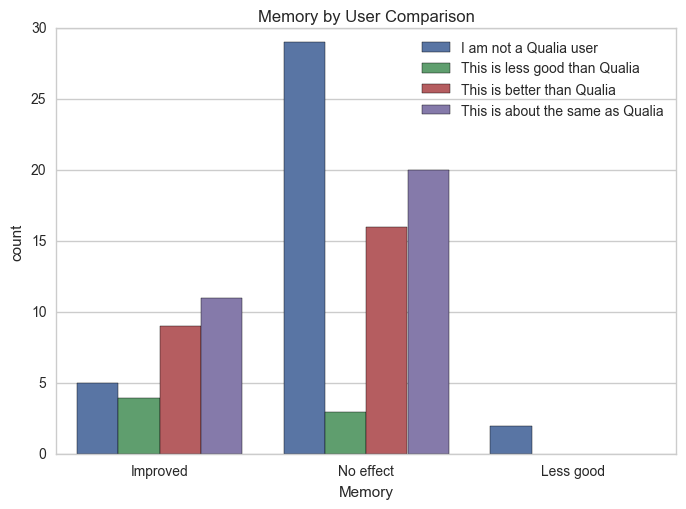

In [50]:
sns.countplot(x='Memory', data=df, hue='Current_User_Comparison')
plt.legend(loc='upper right')
plt.title('Memory by User Comparison')

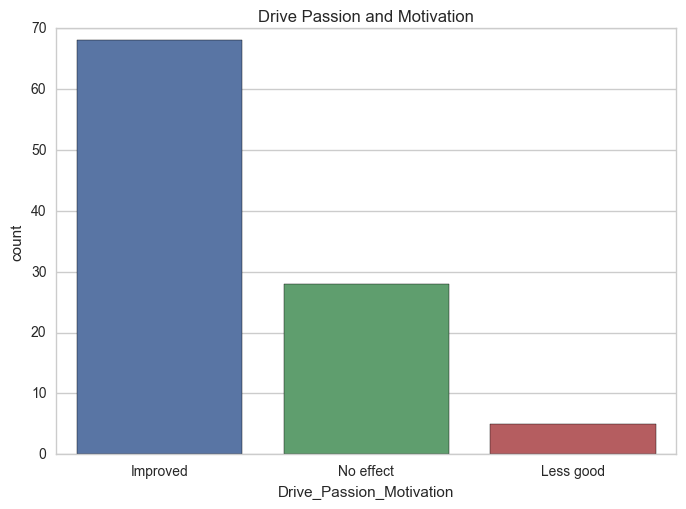

In [109]:
sns.countplot(x='Drive_Passion_Motivation', data=df)
plt.title('Drive Passion and Motivation')

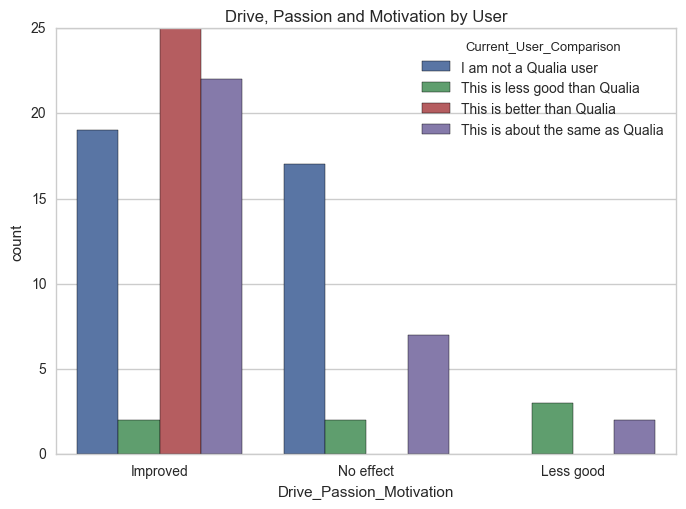

In [107]:
sns.countplot(x='Drive_Passion_Motivation', data=df, hue='Current_User_Comparison')
plt.title('Drive, Passion and Motivation by User')

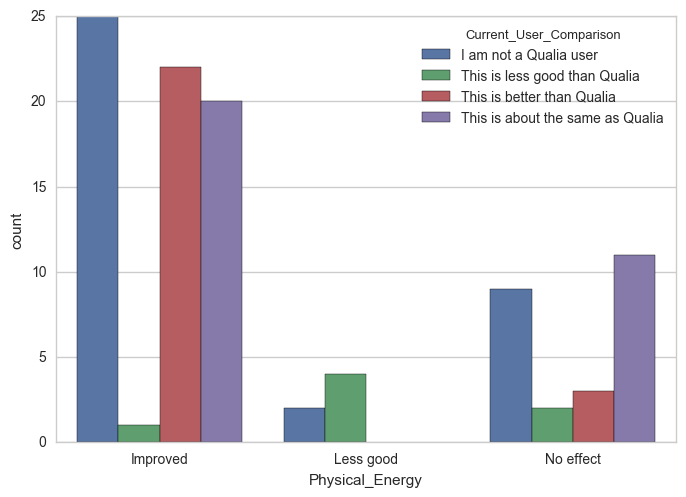

In [62]:
sns.countplot(x='Physical_Energy', data=df, hue='Current_User_Comparison')


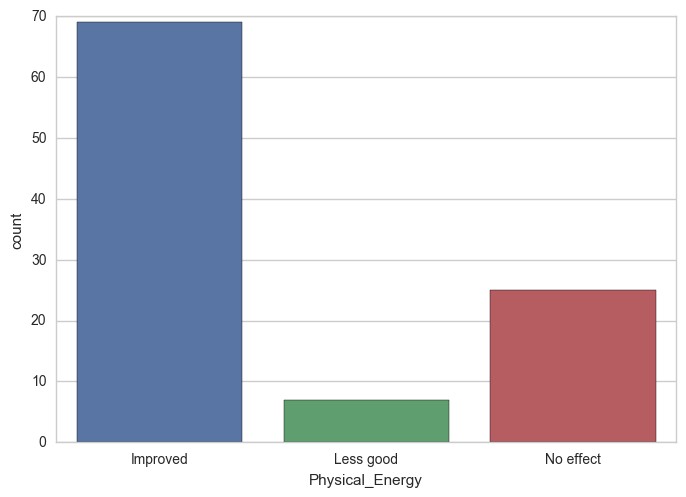

In [122]:
sns.countplot(x='Physical_Energy', data=df)


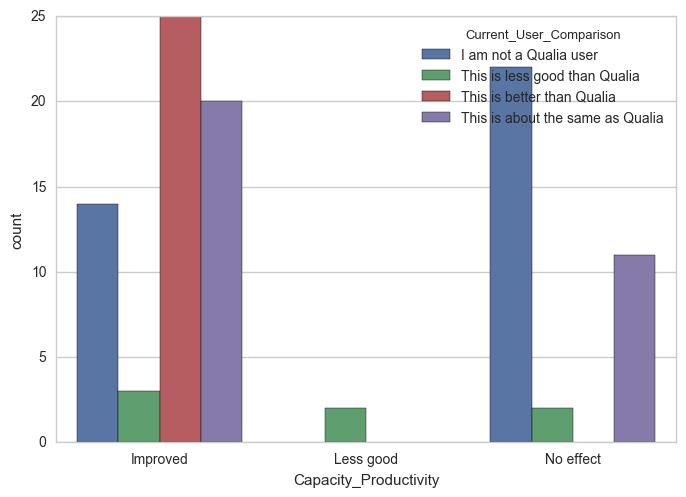

In [65]:
sns.countplot(x='Capacity_Productivity', data=df, hue='Current_User_Comparison')

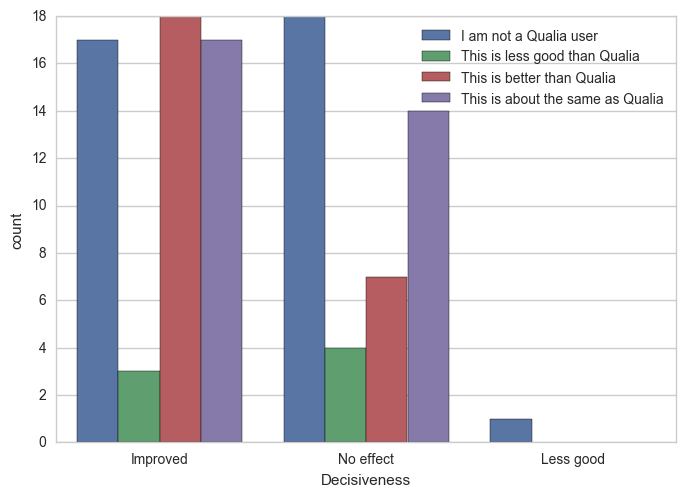

In [69]:
sns.countplot(x='Decisiveness', data=df, hue='Current_User_Comparison')
plt.legend(loc='upper right')

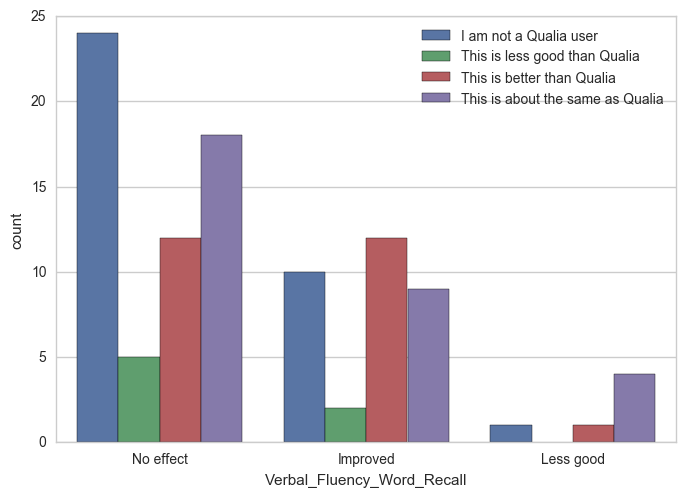

In [73]:
sns.countplot(x='Verbal_Fluency_Word_Recall', data=df, hue='Current_User_Comparison')
plt.legend(loc='upper right')

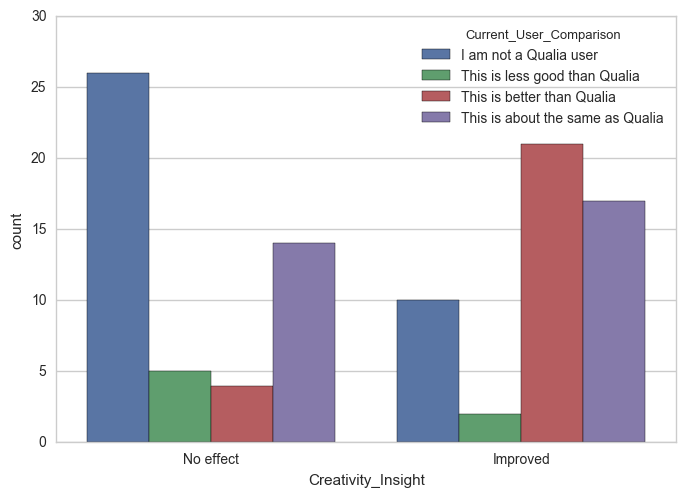

In [77]:
sns.countplot(x='Creativity_Insight', data=df, hue='Current_User_Comparison')

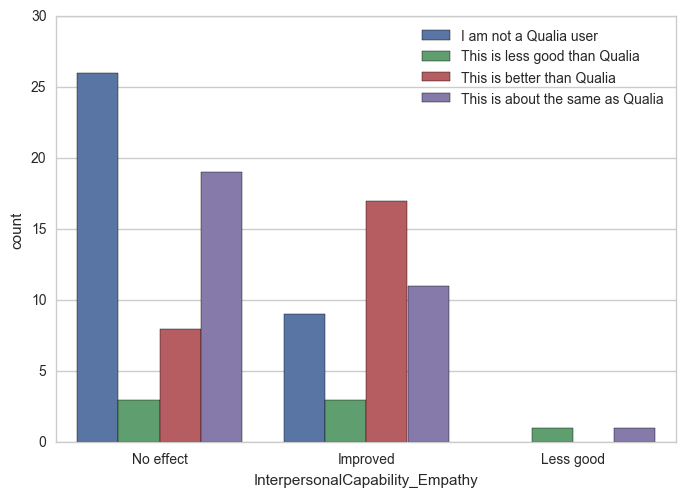

In [113]:
sns.countplot(x='InterpersonalCapability_Empathy', data=df, hue='Current_User_Comparison')
plt.legend(loc='upper right')

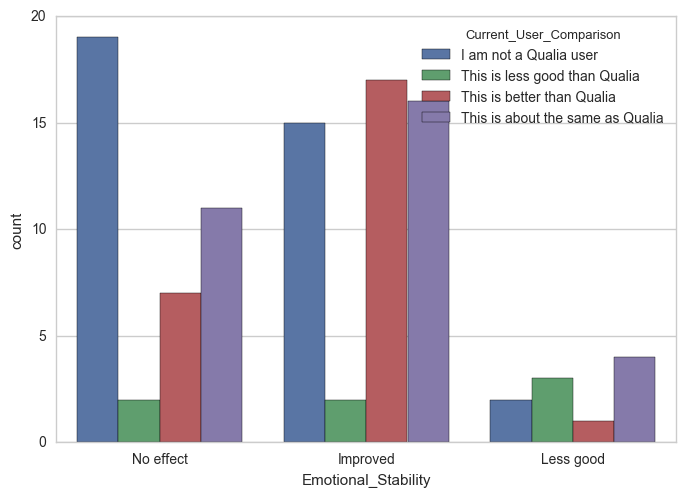

In [115]:
sns.countplot(x='Emotional_Stability', data=df, hue='Current_User_Comparison')


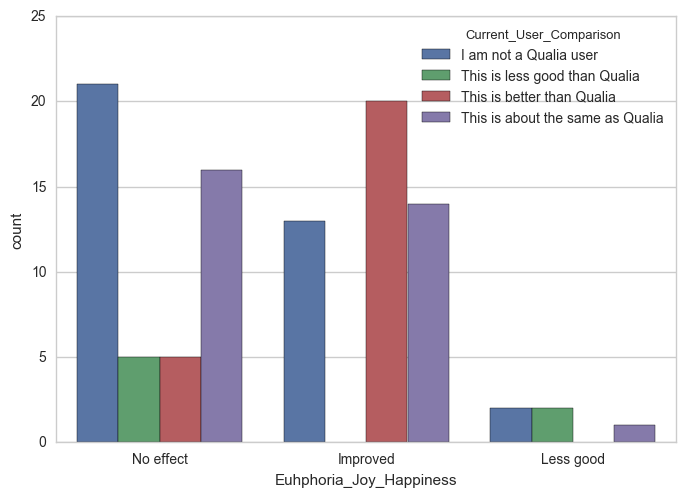

In [117]:
sns.countplot(x='Euhphoria_Joy_Happiness', data=df, hue='Current_User_Comparison')


Index([u'Start_Date', u'End_Date', u'Last_Name', u'Version_Duration',
       u'Sleep_Quality', u'Overall_Experience', u'Focus_Atten_Concen',
       u'Memory', u'Drive_Passion_Motivation', u'Physical_Energy',
       u'Capacity_Productivity', u'Decisiveness',
       u'Verbal_Fluency_Word_Recall', u'Creativity_Insight',
       u'InterpersonalCapability_Empathy', u'Emotional_Stability',
       u'Euhphoria_Joy_Happiness', u'Estimated_Effect_Duration',
       u'Current_User_Comparison', u'Upper_Effect_Duration',
       u'Lower_Effect_Duration'],
      dtype='object')

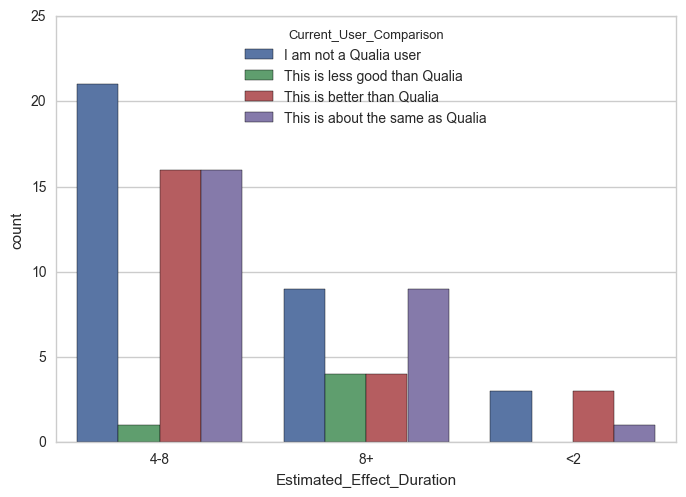

In [118]:
sns.countplot(x='Estimated_Effect_Duration', data=df, hue='Current_User_Comparison')


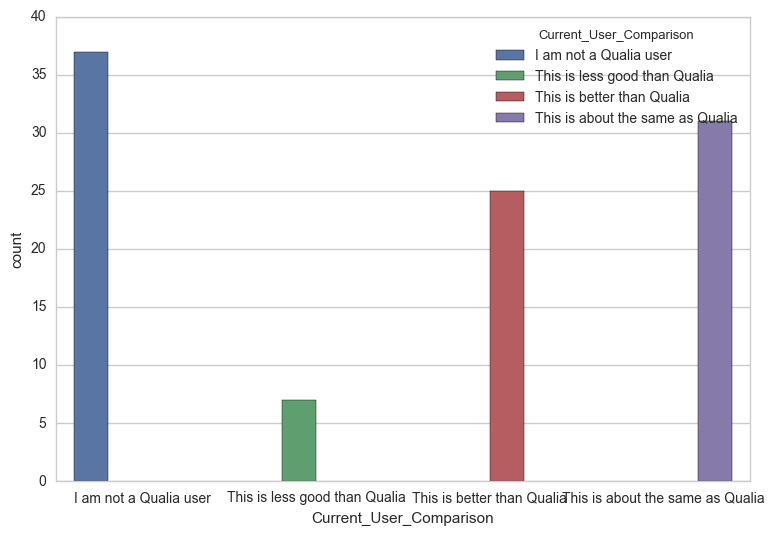

In [120]:
sns.countplot(x='Current_User_Comparison', data=df, hue='Current_User_Comparison')
plt.tight_layout()